CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.
CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.
Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.
Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('car data.csv')

In [3]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
dataset.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [6]:
# duplicate
len(dataset[dataset.duplicated()])

2

In [7]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
dataset[dataset.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


# EDA 

## Univariate analysis

    Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. The prefix "uni" means one, emphasizing the fact that the analysis only accounts for one variable's effect on a dependent variable.

In [35]:
dataset.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Bajaj Dominar 400            1
Activa 4g                    1
Hero Splender Plus           1
Royal Enfield Bullet 350     1
Bajaj Avenger 150 street     1
Name: Car_Name, Length: 98, dtype: int64

In [36]:
dataset.drop(['Car_Name'],axis=1,inplace= True)

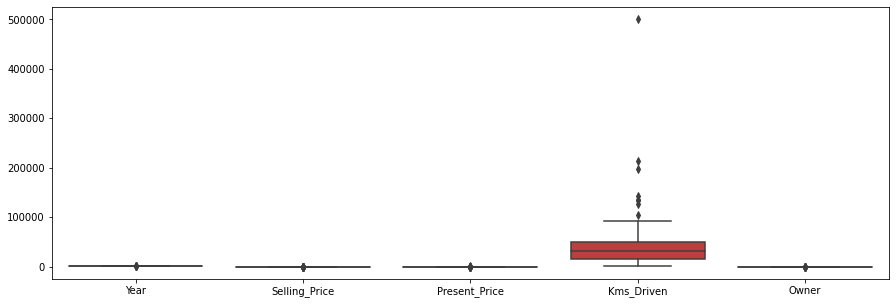

In [43]:
# Year

plt.figure(figsize = (15,5))
sns.boxplot(data=dataset)
plt.show()

In [54]:
q1 = dataset['Kms_Driven'].quantile(0.25)
q3 = dataset['Kms_Driven'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr,UL,LL)

33767.0 99417.5 -35650.5


In [56]:
dataset[dataset['Kms_Driven']>UL]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [58]:
dataset[dataset['Kms_Driven']>UL].count()['Kms_Driven']

8

In [61]:
#Removing the outliers 

df = dataset[dataset['Kms_Driven']<UL]
dataset= df
dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


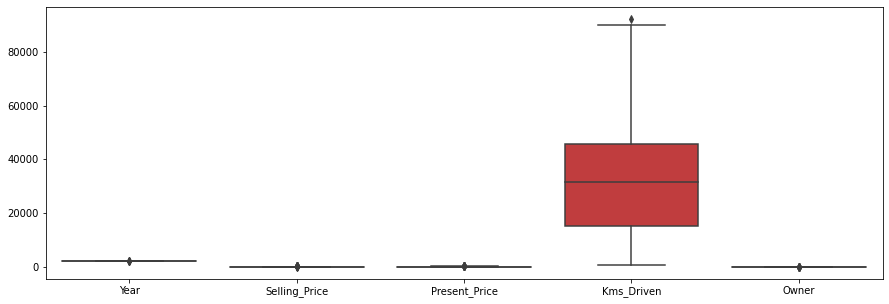

In [91]:
#Rechecking the box limit for outliers

plt.figure(figsize = (15,5))
sns.boxplot(data=dataset)
plt.show()

In [72]:
dataset[dataset['Kms_Driven']>UL]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


In [73]:
num = dataset.columns 

In [74]:
num

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Text(0.5, 1.0, 'This is left Skewed')

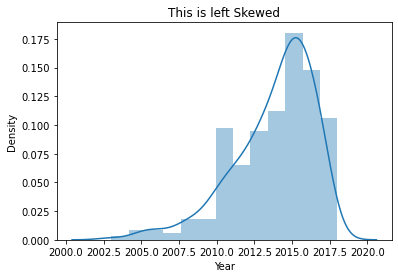

In [80]:
sns.distplot(dataset['Year'])

plt.title('This is left Skewed')

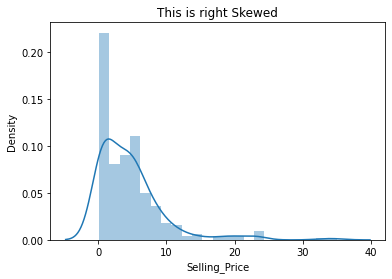

In [81]:
sns.distplot(dataset['Selling_Price'])
plt.title('This is right Skewed')
plt.show()

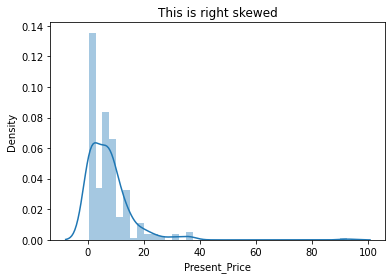

In [83]:
sns.distplot(dataset['Present_Price'])
plt.title('This is right skewed')
plt.show()

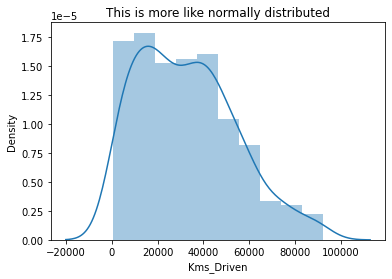

In [92]:
sns.distplot(dataset['Kms_Driven'])
plt.title('This is more like normally distributed')
plt.show()

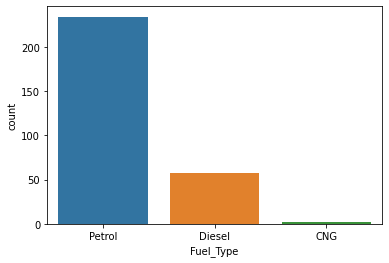

In [87]:
sns.countplot(dataset['Fuel_Type'])
plt.show()

<AxesSubplot:xlabel='Transmission', ylabel='count'>

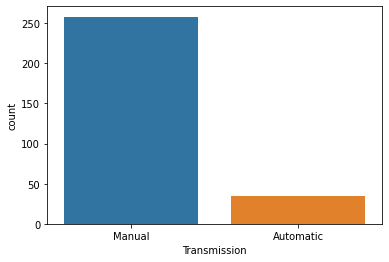

In [89]:
sns.countplot(dataset['Transmission'])

<AxesSubplot:xlabel='Owner', ylabel='count'>

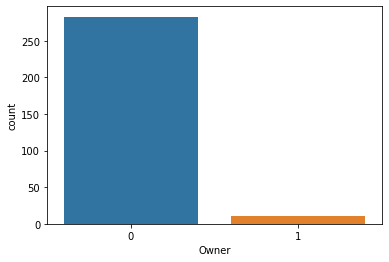

In [90]:
sns.countplot(dataset['Owner'])

# Bivariate analysis

It is performed to find the relationship between each variable in the dataset and the target variable of interest (or) using 2 variables and finding the relationship between them.

So let's understand the behaviour of Selling_Price with other independent variables.

[Text(0.5, 0, 'Kms_Driven'), Text(0, 0.5, 'Selling_Price')]

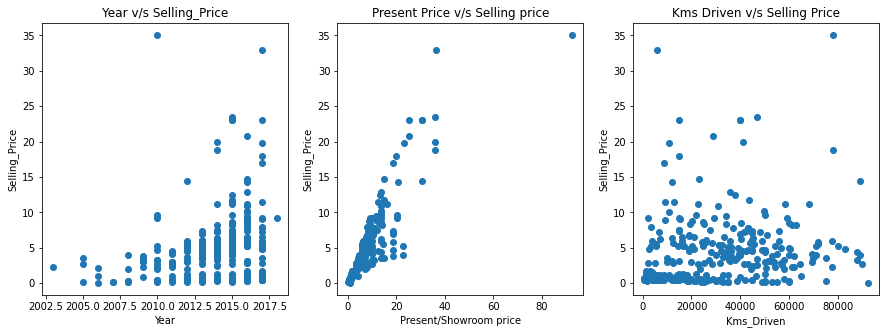

In [113]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))

# Plot 1 for years vs selling price
ax1.scatter(x= dataset['Year'], y = dataset['Selling_Price'])
ax1.set_title('Year v/s Selling_Price')
ax1.set(xlabel = 'Year', ylabel='Selling_Price')

# Plot2 for Present price vs selling price
ax2.scatter(x=dataset['Present_Price'], y= dataset['Selling_Price'])
ax2.set_title('Present Price v/s Selling price')
ax2.set(xlabel = 'Present/Showroom price', ylabel='Selling_Price')

# Plot 3 for Kms_Driven vs Selling price
ax3.scatter(x= dataset['Kms_Driven'], y= dataset['Selling_Price'])
ax3.set_title('Kms Driven v/s Selling Price')
ax3.set(xlabel='Kms_Driven',ylabel='Selling_Price')


Text(0.5, 1.0, 'Seller_Type v/s Selling_Price')

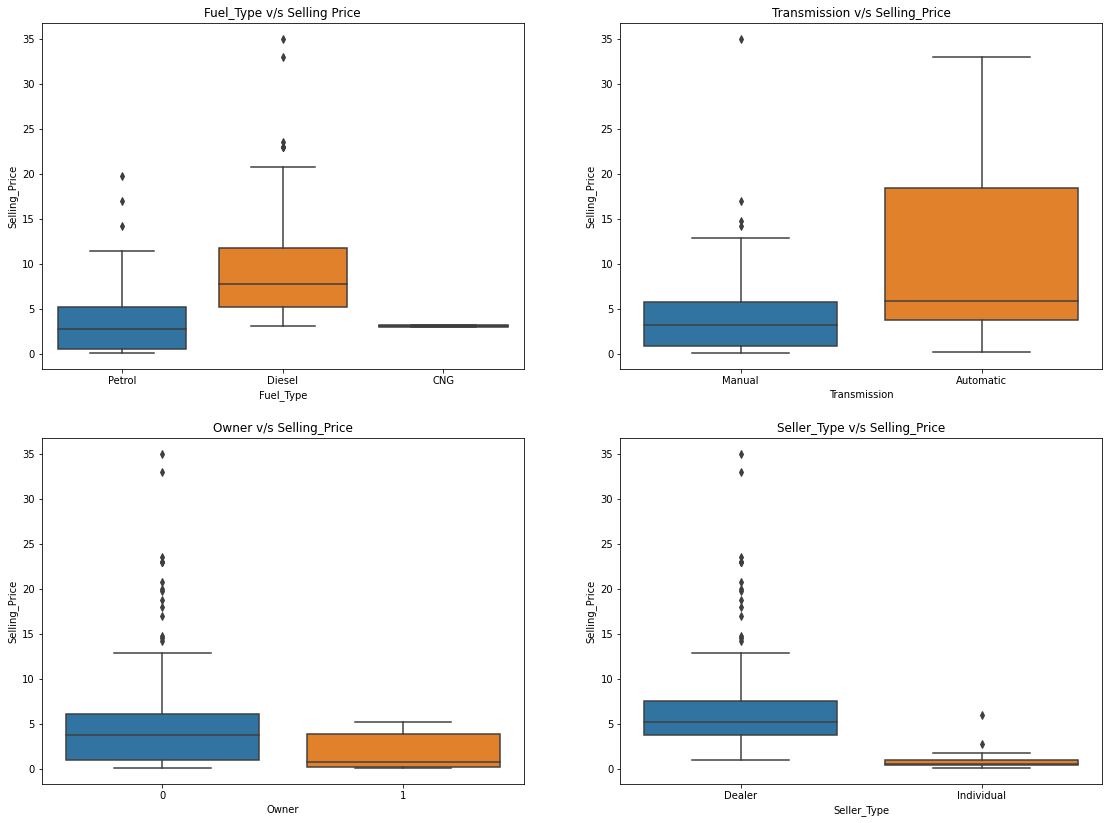

In [121]:
fig,axes = plt.subplots(2,2, figsize=(19,14))

#Plotting the Selling price vs fuel type
sns.boxplot(x=dataset.Fuel_Type, y=dataset.Selling_Price, ax=axes[0][0])
axes[0][0].set_title('Fuel_Type v/s Selling Price')

#Plotting Transmission vs selling price
sns.boxplot(x = dataset.Transmission, y=dataset.Selling_Price, ax=axes[0][1])
axes[0][1].set_title('Transmission v/s Selling_Price')

#Plotting Owner vs selling price
sns.boxplot(x = dataset.Owner, y=dataset.Selling_Price, ax=axes[1][0])
axes[1][0].set_title('Owner v/s Selling_Price')

#Plotting Seller_Type vs selling price
sns.boxplot(x = dataset.Seller_Type, y=dataset.Selling_Price, ax=axes[1][1])
axes[1][1].set_title('Seller_Type v/s Selling_Price')


# Multivariate analysis

Multivariate analysis (MVA) is a Statistical procedure for analysis of data involving more than one type of measurement or observation. It may also mean solving problems where more than one dependent variable is analyzed simultaneously with other variables.

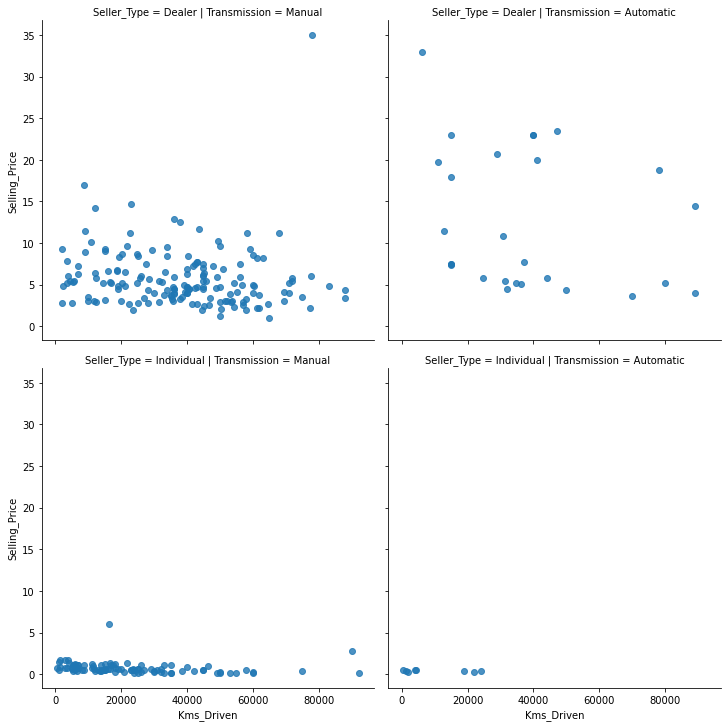

In [123]:
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=dataset,fit_reg=False,col='Transmission',row='Seller_Type')   
plt.show()

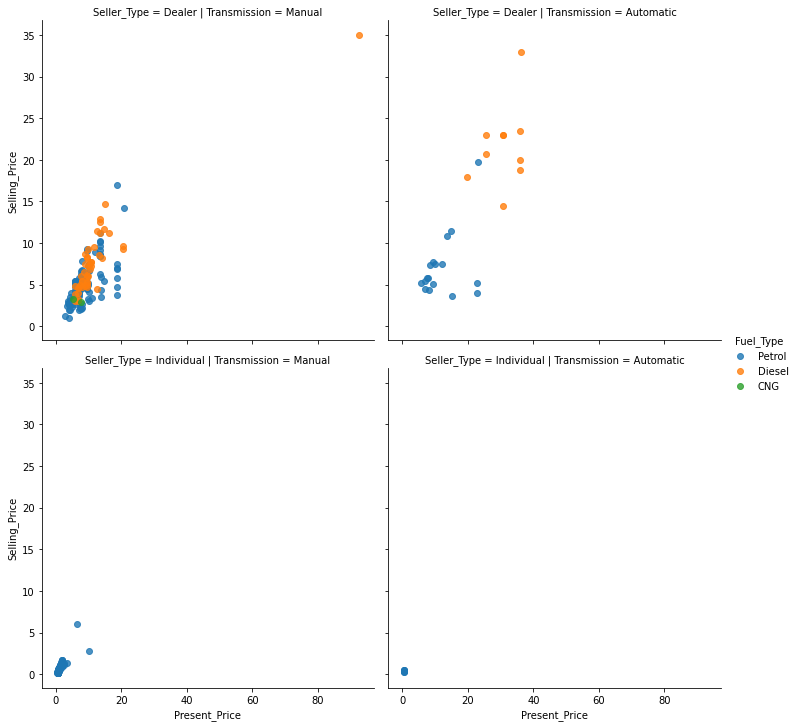

In [124]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=dataset,fit_reg=False,col='Transmission',row='Seller_Type',hue='Fuel_Type')   
plt.show()

In [125]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [126]:
dataset.Fuel_Type.value_counts()

Petrol    234
Diesel     57
CNG         2
Name: Fuel_Type, dtype: int64

In [127]:
dataset.Seller_Type.value_counts()

Dealer        192
Individual    101
Name: Seller_Type, dtype: int64

In [128]:
dataset.Seller_Type.value_counts()

Dealer        192
Individual    101
Name: Seller_Type, dtype: int64

In [129]:
dataset.Transmission.value_counts()

Manual       258
Automatic     35
Name: Transmission, dtype: int64

In [130]:
#Creating dummies for independent variables
dataset = pd.get_dummies(dataset, columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [131]:
dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,1,0,1
299,2017,11.50,12.50,9000,0,1,0,0,1


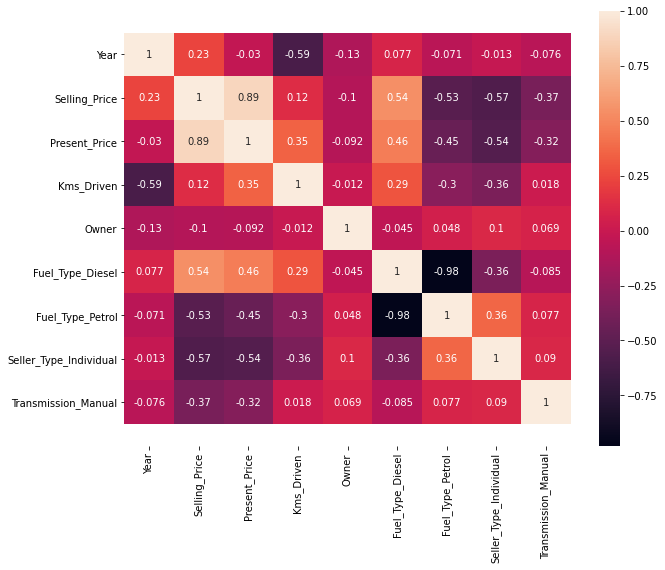

In [134]:
plt.figure(figsize=(10,8))
cor = dataset.corr()
ax = sns.heatmap(cor,annot=True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [135]:
y = dataset['Selling_Price']
x = dataset.drop(['Selling_Price'], axis=1)

In [138]:
x

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,0,1
297,2015,5.90,60000,0,0,1,0,1
298,2009,11.00,87934,0,0,1,0,1
299,2017,12.50,9000,0,1,0,0,1


In [143]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size = 0.20 , random_state = 1)

In [145]:
#standardization of the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler() 
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=x.columns)

X_test=sc.fit_transform(X_test)
X_test=pd.DataFrame(X_test,columns=x.columns)

In [146]:
#Building model using sklearn(Gradient Descent)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # training the algorithm

# Getting the coefficients and intercept

print('coefficients:\n', lin_reg.coef_)
print('\n intercept:', lin_reg.intercept_)
#coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])  
#print(coeff_df)

#Now predicting on the test data

y_pred = lin_reg.predict(X_test)

coefficients:
 [ 0.78402391  3.85698705 -0.73272057  0.09763507  0.92684974  0.13521699
 -0.77788427 -0.63927438]

 intercept: 4.718247863247864


In [148]:
# compare the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.reset_index(inplace=True,drop=True)
df

,Actual,Predicted
0,0.60,1.050935
1,8.65,8.954928
2,0.35,2.289552
3,4.75,6.330377
4,1.10,-0.096309
5,6.00,4.372516
6,17.00,12.829632
7,4.50,6.114921
8,11.25,10.881399
9,3.10,4.668575


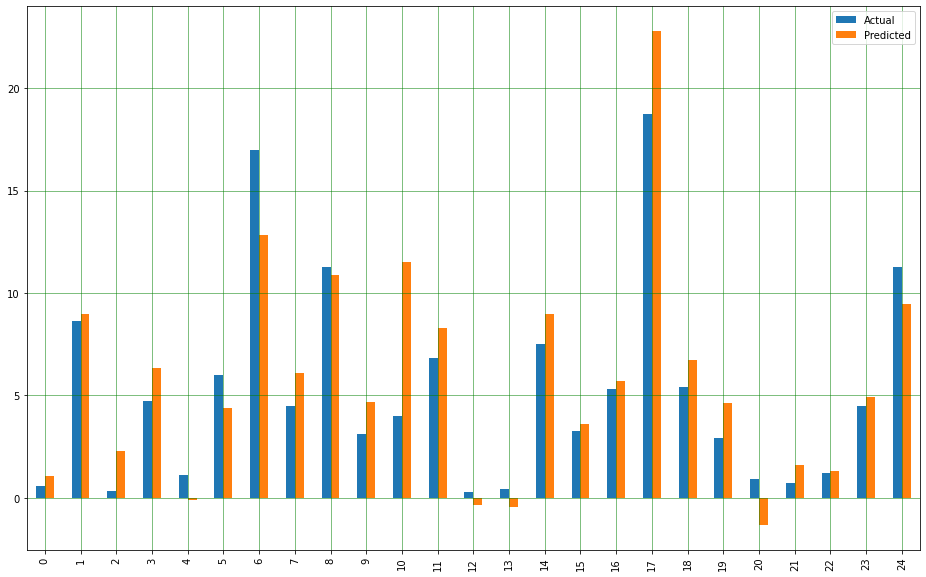

In [154]:
#Showing the difference between the actual and predicted value

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [150]:
#Calculating the accuracy 

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_test,y_pred))

#or
#print('rsquare_Train', lin_reg.score(X_train, y_train))
#print('rsquare_Test', lin_reg.score(X_test, y_test)) 

Mean Absolute Error: 1.3006511696710088
Mean Squared Error: 3.2991269954289817
Root Mean Squared Error: 1.8163499099647573
r2_score: 0.8479483707230883


In [152]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

y = dataset['Selling_Price']
X = dataset.drop(['Selling_Price'],axis=1)
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     301.8
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          5.17e-134
Time:                        19:20:13   Log-Likelihood:                -559.84
No. Observations:                 293   AIC:                             1138.
Df Residuals:                     284   BIC:                             1171.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -542